<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran, OpenAI</font></span>
        <span><br><font size=3>Machine Learning Workshop</font></span>
        <span><br><font size=3>Spring 2023</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block>

</div>

## Table of Contents
* [1. Decision Tree](#3)
    * [Intro](#3.1)
    * [Idea](#3.2)
    * [Attribute Selection Measures](#3.3)
        * [Information Gain](#3.3.1)
        * [Gain Ratio](#3.3.2)
        * [Gini index](#3.3.3)    
    * [Hands-On](#3.4)
    * [Pros & Cons](#3.5)

<a id=1></a>

<hr>
<hr>
<hr>

# 1. Decision Tree

Decision Tree is one of the easiest and popular classification algorithms to understand and interpret. It can be utilized for both classification and regression kind of problem.

<a id=1.1></a>

### Introduction

A decision tree is a flowchart-like tree structure where:

* Internal node: feature(or attribute)

* The branch: a decision rule

* Each leaf node: the outcome

This flowchart-like structure helps you in decision making.

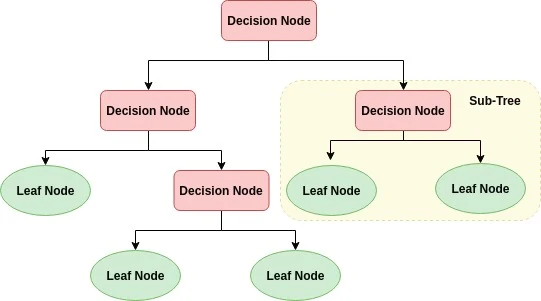

* Decision Tree is a **white box** type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network.

* Its **training time is faster** compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data.

* The decision tree is a **distribution-free or non-parametric method**, which does not depend upon probability distribution assumptions.

* Decision trees can **handle high dimensional data** with **good accuracy**.

<a id=3.2></a>

### How does the Decision Tree algorithm work?

The basic idea behind any decision tree algorithm is as follows:

1- Select the best attribute using Attribute Selection Measures(ASM) to split the records.

2- Make that attribute a decision node and breaks the dataset into smaller subsets.

3- Starts tree building by repeating this process recursively for each child until one of the condition will match:

   * All the tuples belong to the same attribute value.
   * There are no more remaining attributes.
   * There are no more instances.
   
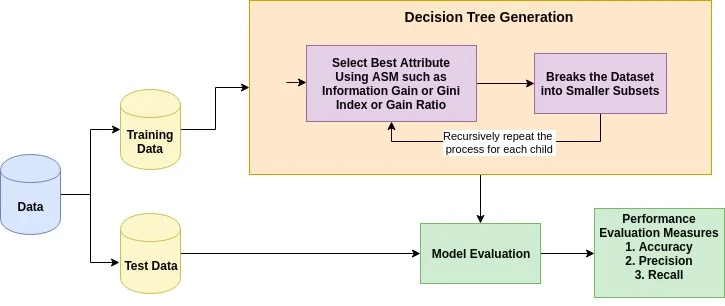

<a id=3.3></a>

### Attribute Selection Measures

Attribute selection measure is a heuristic for selecting the splitting criterion that partition data into the best possible manner. ASM provides a rank to each feature(or attribute) by explaining the given dataset. Best score attribute will be selected as a splitting attribute. In the case of a continuous-valued attribute, split points for branches also need to define. Most popular selection measures are **Information Gain, Gain Ratio, and Gini Index**.

<a id=3.3.1></a>

#### a. Information Gain

Shannon invented the concept of entropy, which measures the impurity of the input set. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy.

Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. **ID3** (Iterative Dichotomiser) decision tree algorithm uses information gain.

Info(D) is the average amount of information needed to identify the class label of a tuple in D:

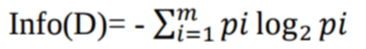

Where, pi is the probability that an arbitrary tuple in D belongs to class Ci.

$info_{A}(D)$ is the expected information required to classify a tuple from D based on the partitioning by A:

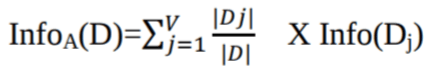

where |Dj|/|D| acts as the weight of the j-th partition.

The attribute A with the highest information gain, Gain(A), is chosen as the splitting attribute at node N():

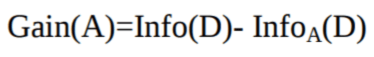

<a id=3.3.2></a>

#### b. Gain Ratio

Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

**C4.5**, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info.

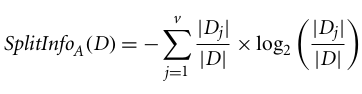

Where,
* |Dj|/|D| acts as the weight of the j-th partition.

* v is the number of discrete values in attribute A.

The gain ratio can be defined as

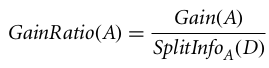

The attribute with the highest gain ratio is chosen as the splitting attribute

<a id=3.3.3></a>

#### c. Gini index

Another decision tree algorithm **CART** (Classification And Regression Tree) uses the Gini method to create split points.

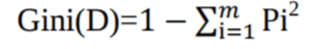

Where, pi is the probability that a tuple in D belongs to class Ci.

The Gini Index considers a **binary split** for each attribute. You can compute a **weighted sum of the impurity of each partition**. If a binary split on attribute A partitions data D into D1 and D2, the Gini index of D is:

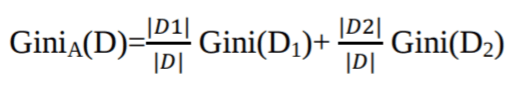

In case of a **discrete-valued attribute**, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. 

In the case of **continuous-valued attributes**, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point.

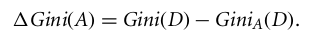

The attribute with minimum Gini index is chosen as the splitting attribute.

<a id=3.4></a>

### Decision Tree Classifier Hands-On

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]
y = pima.label 

In [4]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7359307359307359


You can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

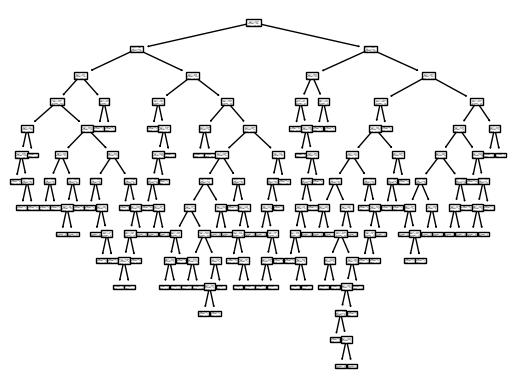

In [15]:
# visualize tree using sklearn
from sklearn import tree
tree.plot_tree(clf);

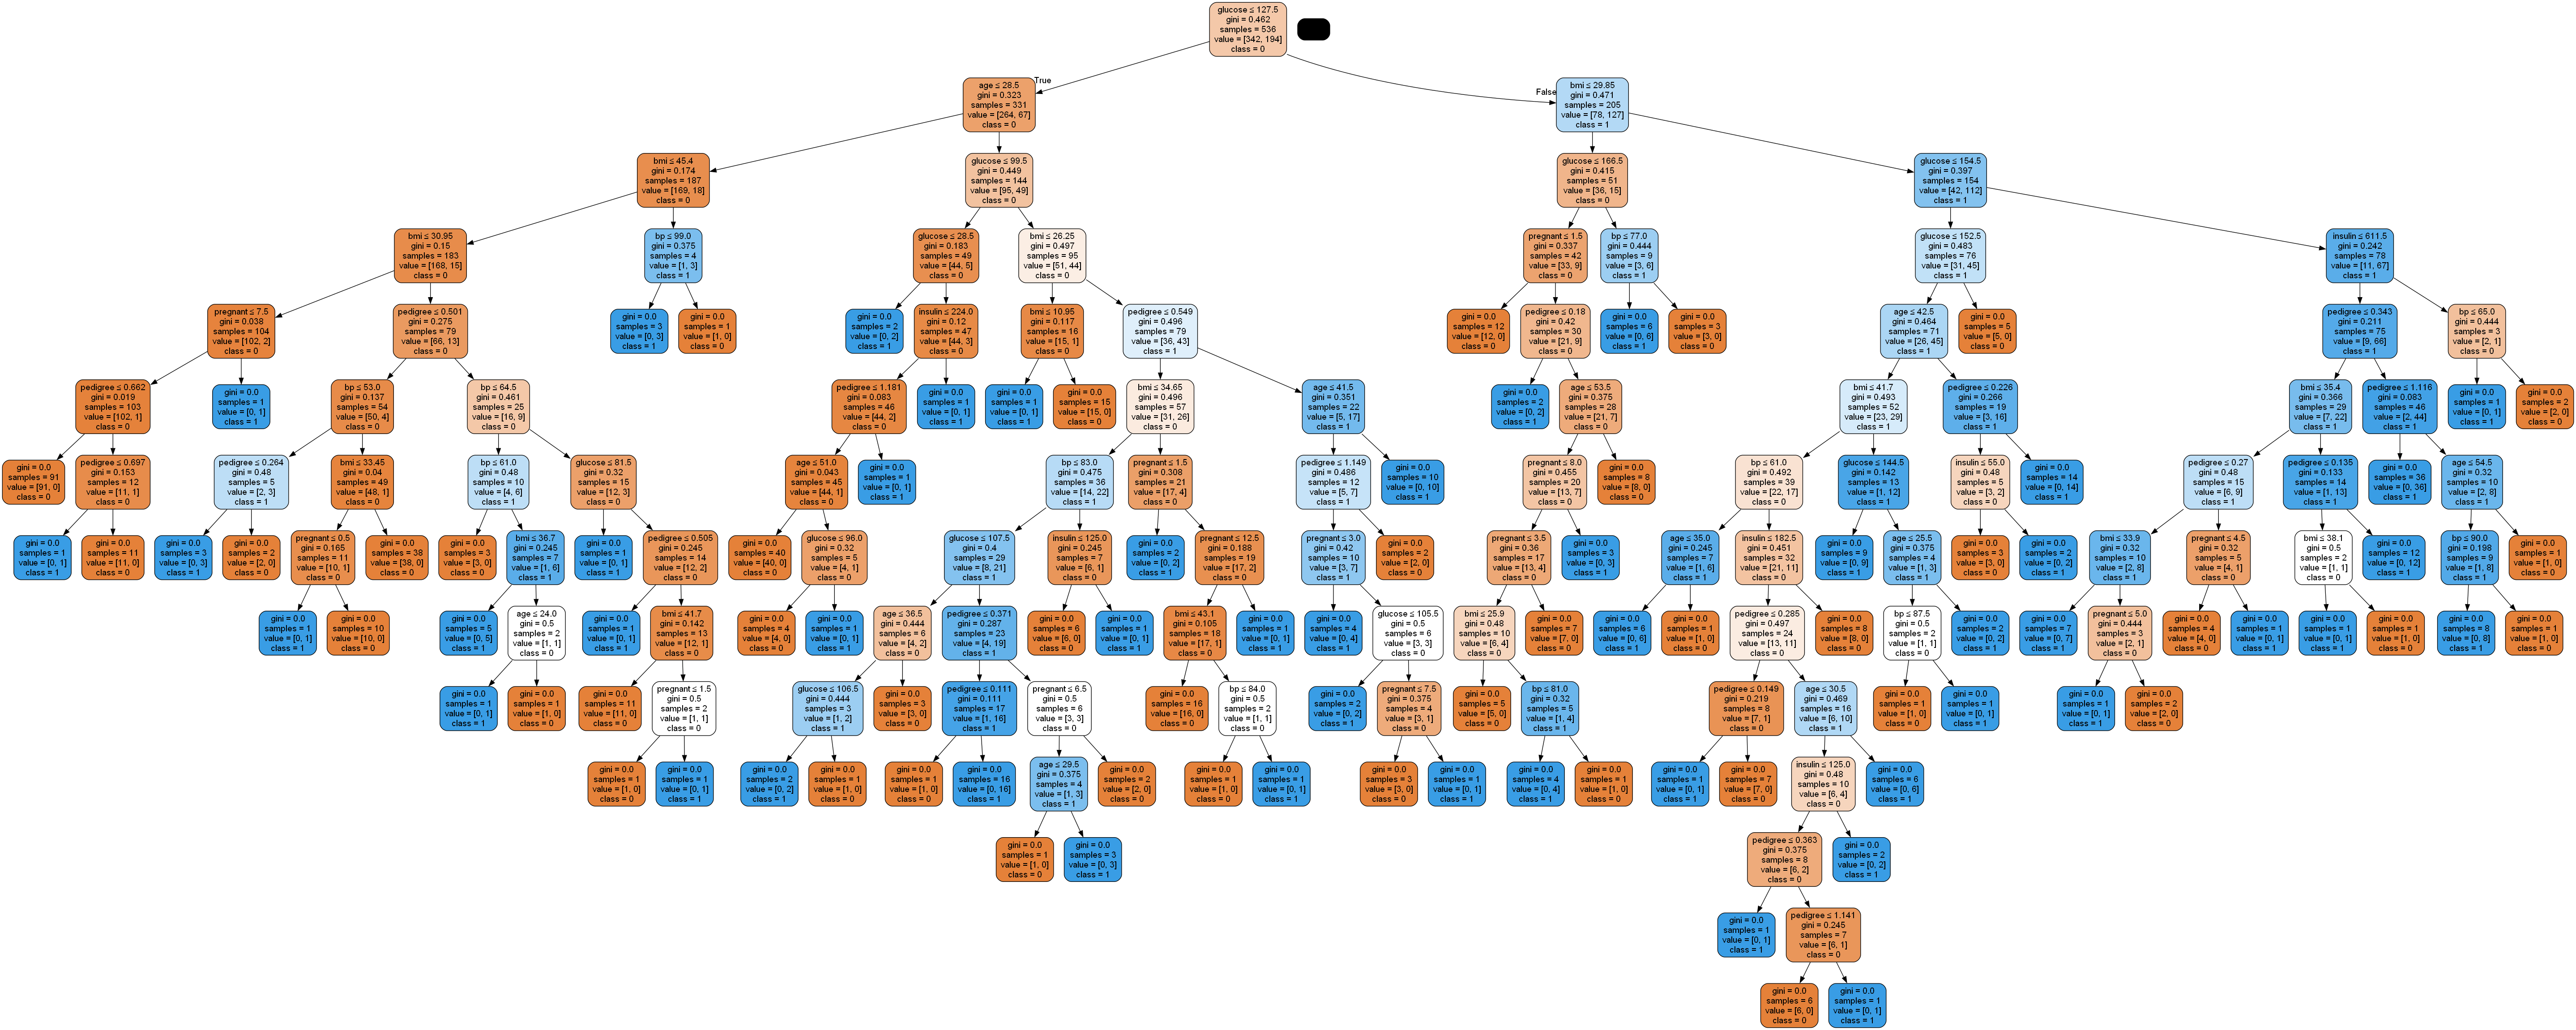

In [8]:
# Visualizing Decision Trees
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6883116883116883


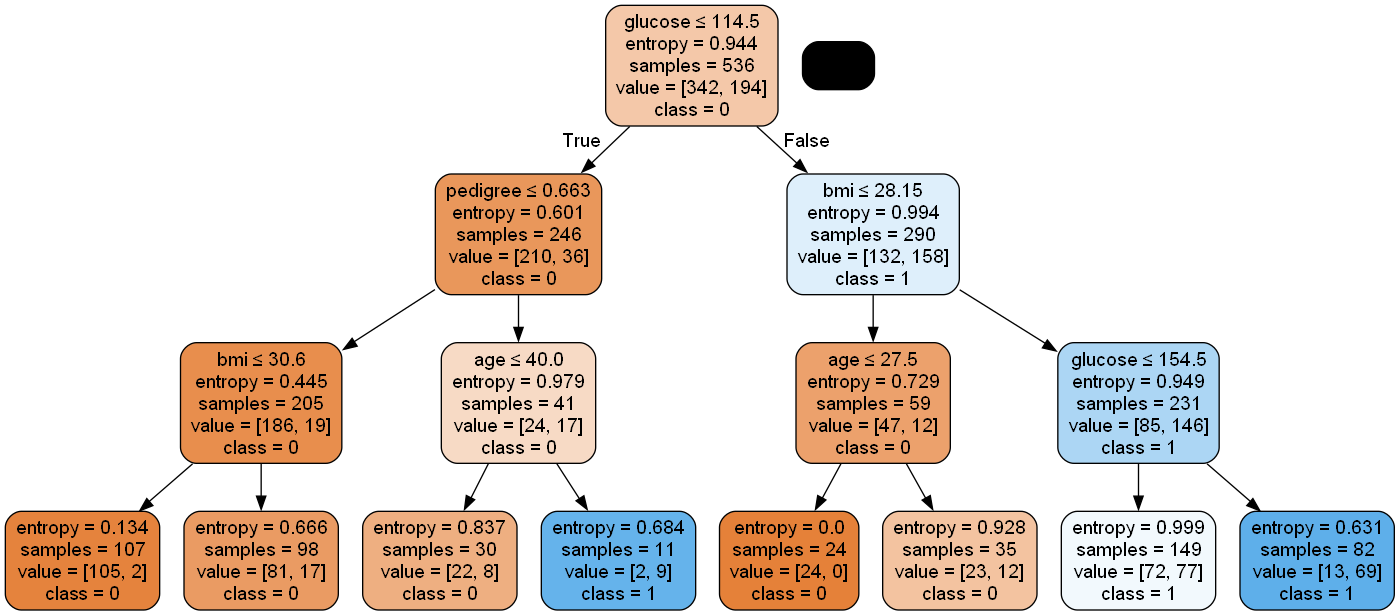

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

<a id=3.5></a>

### Pros & Cons

**Pros:**
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

**Cons:**
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging - and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.


# Good Luck :)